# Fake News Classification.

- Prepared by: <a href = 'https://github.com/sagsshakya'> Sagun Shakya </a>
- MSc. Data Science
- GITAM Institute of Science, Visakhapatnam.
- Email: sags.shakya@gmail.com


#### Dataset: https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

## Workflow:

### Part I: Using titles.
- Using TFIDF Vectorizer.
    - Using Naive Bayes Classification.
    - Using Logistic Regression Classification.
- Using Count Vectorizer.
    - Using Naive Bayes Classification.
    - Using Logistic Regression Classification.

### Part II: Using texts.
- Using TFIDF Vectorizer.
    - Using Naive Bayes Classification.
    - Using Logistic Regression Classification.
- Using Count Vectorizer.
    - Using Naive Bayes Classification.
    - Using Logistic Regression Classification. 

### Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk

#### Working directory.

In [2]:
os.chdir(r'C:\Users\Habeeb\Documents\Sagun\Python\csv files\Fake News')

In [3]:
fake_raw = pd.read_csv('Fake.csv')
true_raw = pd.read_csv('True.csv')

In [4]:
fake_raw.dropna(axis =1, inplace=True)

In [5]:
true_raw.dropna(axis = 1, inplace=True)

In [6]:
fake_raw.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true_raw.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
fake_raw.shape

(23481, 4)

In [9]:
true_raw.shape

(21417, 4)

### Adding labels of True and False for fake news.
- 0: Fake
- 1: True

In [10]:
fake_raw['label'] = np.zeros(fake_raw.shape[0])

In [11]:
true_raw['label'] = np.ones(true_raw.shape[0])

In [12]:
true_raw['label'] = true_raw.label.astype(int)

In [13]:
fake_raw['label'] = fake_raw.label.astype(int)

### Concatenating two dataframes.

In [14]:
merged_df = pd.concat([true_raw, fake_raw], ignore_index=True)

In [15]:
df = merged_df.copy()

### Shuffling the dataframe rows.

In [16]:
def shuffle(dataframe, random_state = 100):
    dd = dataframe.copy()
    dd = dd.sample(frac = 1, random_state = 100)
    dd.reset_index(drop = True, inplace = True)
    return dd

In [17]:
df = shuffle(df)
df.head(20)

,title,text,subject,date,label
0,"China, Pakistan to look at including Afghanist...",BEIJING (Reuters) - China and Pakistan will lo...,worldnews,"December 26, 2017",1
1,10 REASONS A VOTE RECOUNT Is A Really Bad Idea...,Watch Jill Stein explain why she s working to ...,left-news,"Nov 27, 2016",0
2,DEBBIE WASSERMAN SCHULTZ Planned To Continue P...,Democratic Rep. Debbie Wasserman Schultz seemi...,politics,"Jul 29, 2017",0
3,FINALLY: Sheriff Joe Ruled In Contempt Over R...,A Maricopa Country judge has finally stood up ...,News,"May 14, 2016",0
4,Obama says he does not think FBI's Comey is tr...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"November 5, 2016",1
5,TRUMP WAS RIGHT! Why The Heck Is This Liberal ...,If you watch CNBC at all you know John Harwood...,politics,"Oct 28, 2015",0
6,LATE NIGHT HOST Goes Low In Anti-Trump Rant Wi...,COLBERT LANGUAGE WARNING! This late night ho...,politics,"May 2, 2017",0
7,South Korea's Moon asks Russia to continue sup...,"VLADIVOSTOK, Russia (Reuters) - South Korean P...",worldnews,"September 7, 2017",1
8,YOU’LL NEVER BELIEVE WHICH REPUBLICAN JUST CAL...,What kind of leader speaks like this? It s obv...,politics,"Aug 27, 2015",0
9,Alabama Senate election winner due to be certi...,WASHINGTON (Reuters) - The outcome of Alabama’...,politicsNews,"November 18, 2017",1


In [18]:
df.shape

(44898, 5)

### Data Visualization.

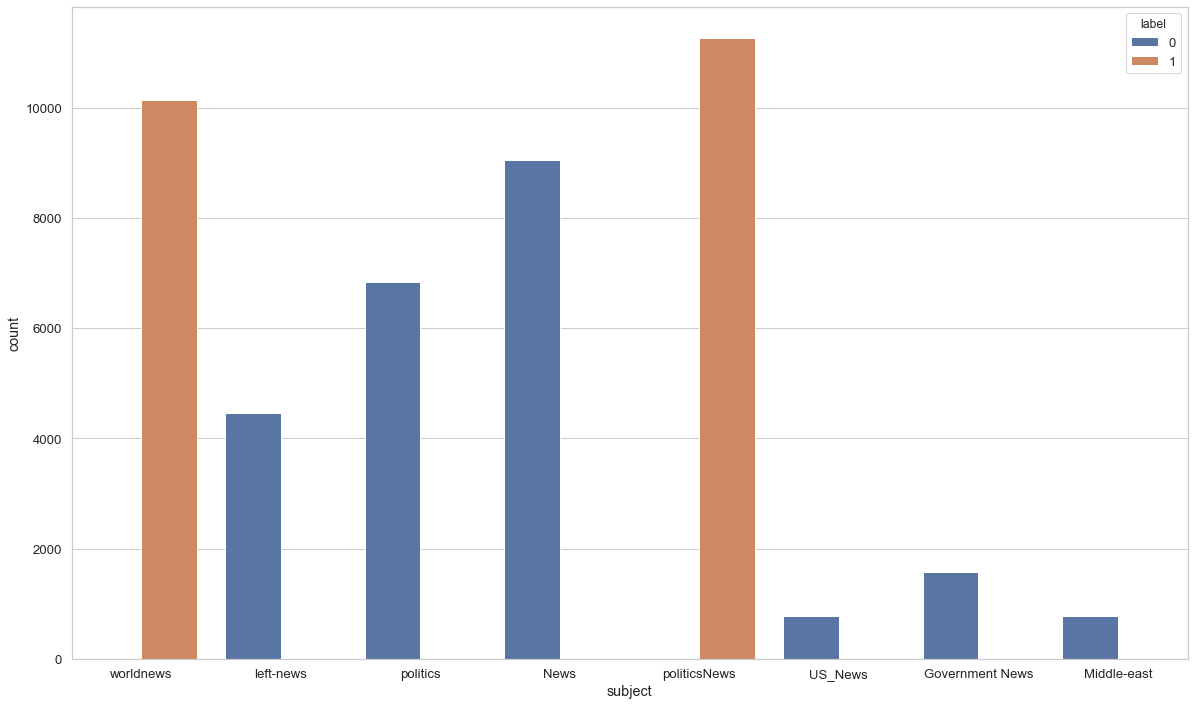

In [19]:
plt.figure(figsize=(20,12))
sns.set(style = 'whitegrid', font_scale = 1.2)

sns.countplot(df['subject'], hue = df['label'])
plt.show()

### Cleaning the text.

In [20]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Habeeb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
def clean_data(text):
    processed = re.sub('[^a-zA-Z0-9]', ' ' , text, flags = re.IGNORECASE)
    # We can use '\W' (non - alphanumeric character or non - word character) instead of '[^a-zA-Z]'.
    processed = processed.replace('  ', ' ')
    processed = processed.replace('   ', ' ')
    processed = processed.replace('    ', ' ')
    processed = processed.replace('u s', 'united states')
    #Convert into LowerCase.
    processed = processed.lower()
    
    #Stemming.
    '''ps = PorterStemmer()
    processed = processed.split()
    processed = [ps.stem(word) for word in processed if not word in set(stopwords.words('english'))]
    '''
    return processed

In [23]:
df['title_processed'] = df['title'].apply(lambda x: clean_data(x))
df['text_processed'] = df['text'].apply(lambda x: clean_data(x))

### Making a column named 'month'.

In [24]:
df['month'] = df['date'].apply(lambda mydate: re.findall('[a-zA-Z]{3,}', mydate)[0])

### Taking only the first three letters of the month names.

In [25]:
df['month'] =df['month'].apply(lambda mymonth:  mymonth[:3])

In [26]:
df.head(2)

,title,text,subject,date,label,title_processed,text_processed,month
0,"China, Pakistan to look at including Afghanist...",BEIJING (Reuters) - China and Pakistan will lo...,worldnews,"December 26, 2017",1,china pakistan to look at including afghanista...,beijing reuters china and pakistan will look ...,Dec
1,10 REASONS A VOTE RECOUNT Is A Really Bad Idea...,Watch Jill Stein explain why she s working to ...,left-news,"Nov 27, 2016",0,10 reasons a vote recount is a really bad idea...,watch jill stein explain why she s working to ...,Nov


<hr>

# Part I:   Using the Titles of the news for the classification.

### Get independent feature.

In [27]:
X = df['title_processed'].iloc[:].values

### Get dependent feature.

In [28]:
y = df['label'].iloc[:].values

## 1.    Using <b>TFIDF</b> vectorizer to get independent features.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

In [30]:
tfidf = TFIDF(stop_words= set(stopwords.words('english')),
              max_features=10000,
              ngram_range=(1,3))

In [31]:
X_vectorized = tfidf.fit_transform(X).toarray()

### Train - Test split.

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = .25, random_state = 100)

### 1.a.    Classification: Multinomial Bayes.

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha = 1.0)

In [35]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [36]:
predictions = classifier.predict(X_test)

### Function: Confusion Matrix.

In [37]:
from sklearn import metrics
import itertools

In [38]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [39]:
cm = metrics.confusion_matrix(y_test, predictions)

Confusion matrix, without normalization


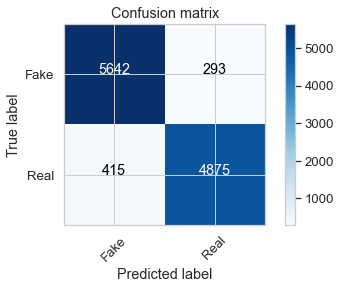

In [40]:
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Accuracy Score:

In [41]:
def accuracy_check(print_values = True):
    if print_values == True:
        print('Accuracy (in %) = ',round(float(metrics.accuracy_score(y_test, predictions) ) *100, 2), '%')
        print('ROC - AUC Score (in %) = ',round(float(metrics.roc_auc_score(y_test, predictions) ) *100, 2), '%')
        print('F1 - Score (in %) = ',round(float(metrics.f1_score(y_test, predictions) ) *100, 2), '%')

    '''acc_dict = dict()
    acc_dict['Accuracy Score'] = metrics.accuracy_score(y_test, predictions
    acc_dict['ROC - AUC Score'] = metrics.roc_auc_score(y_test, predictions)
    acc_dict['F1 - Score'] = metrics.f1_score(y_test, predictions) '''   
    return (round(float(metrics.accuracy_score(y_test, predictions) ) *100, 2),
            round(float(metrics.roc_auc_score(y_test, predictions) ) *100, 2),
            round(float(metrics.f1_score(y_test, predictions) ) *100, 2)
           )

In [42]:
accuracy_check(True)

Accuracy (in %) =  93.69 %
ROC - AUC Score (in %) =  93.61 %
F1 - Score (in %) =  93.23 %


(93.69, 93.61, 93.23)

In [43]:
title_naive_bayes_tfidf = dict()
title_naive_bayes_tfidf['accuracy'], title_naive_bayes_tfidf['roc_auc'], title_naive_bayes_tfidf['f1_score'] = accuracy_check(False)

### 1.b.    Classification: Logistic Regression.

In [44]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C= 0.1)

In [45]:
classifier.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [46]:
predictions = classifier.predict(X_test)

### Confusion Matrix.

Confusion matrix, without normalization


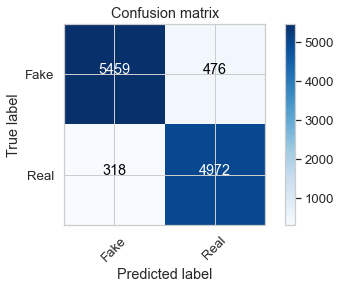

In [47]:
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [48]:
accuracy_check()

Accuracy (in %) =  92.93 %
ROC - AUC Score (in %) =  92.98 %
F1 - Score (in %) =  92.61 %


(92.93, 92.98, 92.61)

In [49]:
title_log_reg_tfidf = dict()
title_log_reg_tfidf['accuracy'], title_log_reg_tfidf['roc_auc'], title_log_reg_tfidf['f1_score'] = accuracy_check(False)

<hr><hr>

## 2.    Using <b>Count Vectorizer</b> to get independent features.

In [50]:
from sklearn.feature_extraction.text import CountVectorizer as CV

In [51]:
cv = CV(stop_words= set(stopwords.words('english')),
              max_features=10000,
              ngram_range=(1,3))

In [52]:
X_vectorized = cv.fit_transform(X).toarray()

### Train - Test split.

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = .25, random_state = 100)

### 2.a.    Classification: Multinomial Bayes.

In [104]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha = 1.0)

In [105]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [106]:
predictions = classifier.predict(X_test)

### Confusion Matrix.

Confusion matrix, without normalization


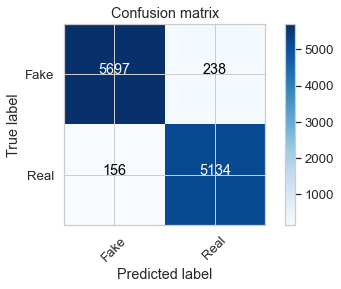

In [107]:
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [108]:
accuracy_check()

Accuracy (in %) =  96.49 %
ROC - AUC Score (in %) =  96.52 %
F1 - Score (in %) =  96.3 %


(96.49, 96.52, 96.3)

In [109]:
title_naive_bayes_cv = dict()
title_naive_bayes_cv['accuracy'], title_naive_bayes_cv['roc_auc'], title_naive_bayes_cv['f1_score'] = accuracy_check(False)

### 2.b.    Classification: Logistic Regression.

In [60]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C= 0.1)

In [61]:
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

### Confusion Matrix.

Confusion matrix, without normalization


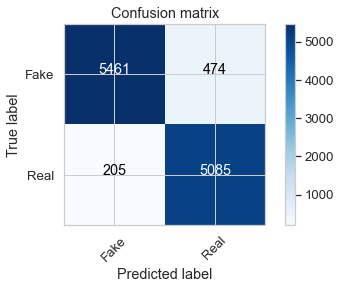

In [62]:
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [63]:
accuracy_check()

Accuracy (in %) =  93.95 %
ROC - AUC Score (in %) =  94.07 %
F1 - Score (in %) =  93.74 %


(93.95, 94.07, 93.74)

In [64]:
title_log_reg_cv = dict()
title_log_reg_cv['accuracy'], title_log_reg_cv['roc_auc'], title_log_reg_cv['f1_score'] = accuracy_check(False)

<hr><hr><hr>

# Part II:   Using the Text of the news for the classification.

### Get independent feature.

In [65]:
X = df['text_processed'].iloc[:].values

### Get dependent feature.

In [66]:
y = df['label'].iloc[:].values

## 1.    Using <b>TFIDF</b> vectorizer to get independent features.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIDF

tfidf = TFIDF(stop_words= set(stopwords.words('english')),
              max_features=10000,
              ngram_range=(1,3))

In [68]:
X_vectorized = tfidf.fit_transform(X).toarray()

### Train - Test split.

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = .25, random_state = 100)

### 1.a.    Classification: Multinomial Bayes.

In [70]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha = 1.0)

In [71]:
classifier.fit(X_train, y_train)

MultinomialNB()

In [72]:
predictions = classifier.predict(X_test)

#### Confusion Matrix.

Confusion matrix, without normalization


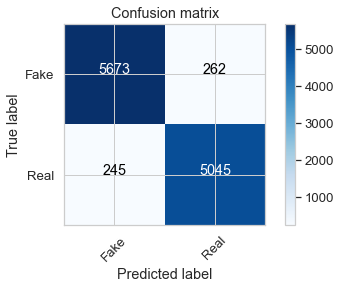

In [73]:
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(cm, classes=['Fake', 'Real'])

### Accuracy Score:

In [74]:
accuracy_check(True)

Accuracy (in %) =  95.48 %
ROC - AUC Score (in %) =  95.48 %
F1 - Score (in %) =  95.22 %


(95.48, 95.48, 95.22)

In [75]:
text_naive_bayes_tfidf = dict()
text_naive_bayes_tfidf['accuracy'], text_naive_bayes_tfidf['roc_auc'], text_naive_bayes_tfidf['f1_score'] = accuracy_check(False)

### 1.b.    Classification: Logistic Regression.

In [127]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C= 0.1)

In [128]:
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

### Confusion Matrix.

Confusion matrix, without normalization


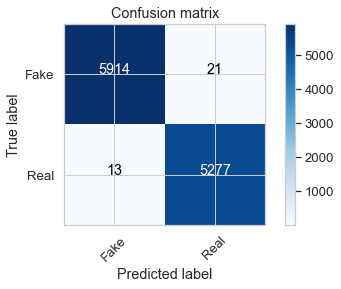

In [129]:
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [130]:
accuracy_check()

Accuracy (in %) =  99.7 %
ROC - AUC Score (in %) =  99.7 %
F1 - Score (in %) =  99.68 %


(99.7, 99.7, 99.68)

In [131]:
text_log_reg_tfidf = dict()
text_log_reg_tfidf['accuracy'], text_log_reg_tfidf['roc_auc'], text_log_reg_tfidf['f1_score'] = accuracy_check(False)

<hr><hr>

## 2.    Using <b>Count Vectorizer</b> to get independent features.

In [81]:
from sklearn.feature_extraction.text import CountVectorizer as CV

cv = CV(stop_words= set(stopwords.words('english')),
              max_features=10000,
              ngram_range=(1,3))

In [82]:
X_vectorized = cv.fit_transform(X).toarray()

### Train - Test split.

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size = .25, random_state = 100)

### 2.a.    Classification: Multinomial Bayes.

In [84]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB(alpha = 1.0)

In [85]:
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

### Confusion Matrix.

Confusion matrix, without normalization


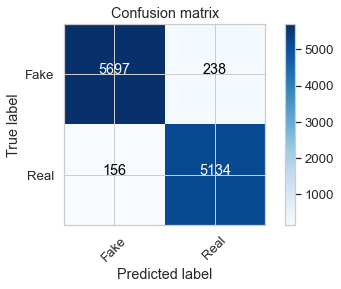

In [86]:
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [87]:
accuracy_check()

Accuracy (in %) =  96.49 %
ROC - AUC Score (in %) =  96.52 %
F1 - Score (in %) =  96.3 %


(96.49, 96.52, 96.3)

In [88]:
text_naive_bayes_cv = dict()
text_naive_bayes_cv['accuracy'], text_naive_bayes_cv['roc_auc'], text_naive_bayes_cv['f1_score'] = accuracy_check(False)

### 2.b.    Classification: Logistic Regression.

In [89]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(C= 0.1)

In [90]:
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

### Confusion Matrix.

Confusion matrix, without normalization


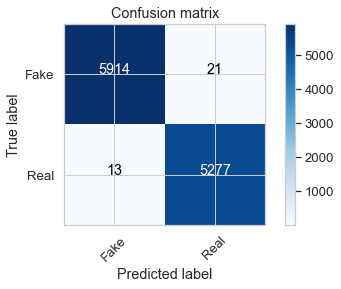

In [91]:
cm = metrics.confusion_matrix(y_test, predictions)

plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [92]:
accuracy_check()

Accuracy (in %) =  99.7 %
ROC - AUC Score (in %) =  99.7 %
F1 - Score (in %) =  99.68 %


(99.7, 99.7, 99.68)

In [93]:
text_log_reg_cv = dict()
text_log_reg_cv['accuracy'], text_log_reg_cv['roc_auc'], text_log_reg_cv['f1_score'] = accuracy_check(False)

<hr>

## Summarizing the results.

### I. Using TITLES.

In [113]:
summary_title_accuracy = pd.DataFrame({
    'TFIDF': [title_naive_bayes_tfidf['accuracy'], title_log_reg_tfidf['accuracy']],
    'Count_Vectorizer': [title_naive_bayes_cv['accuracy'], title_log_reg_cv['accuracy']]
}, index=['Naive Bayes', 'Logistic Regression'])

In [114]:
summary_title_roc_auc = pd.DataFrame({
    'TFIDF': [title_naive_bayes_tfidf['roc_auc'], title_log_reg_tfidf['roc_auc']],
    'Count_Vectorizer': [title_naive_bayes_cv['roc_auc'], title_log_reg_cv['roc_auc']]
}, index=['Naive Bayes', 'Logistic Regression'])

In [115]:
summary_title_f1_score = pd.DataFrame({
    'TFIDF': [title_naive_bayes_tfidf['f1_score'], title_log_reg_tfidf['f1_score']],
    'Count_Vectorizer': [title_naive_bayes_cv['f1_score'], title_log_reg_cv['f1_score']]
}, index=['Naive Bayes', 'Logistic Regression'])

In [125]:
print('Accuracy using TITLES: \n')
print(summary_title_accuracy)
print('\n-------------------------------------\n')
print('ROC - AUC Score using TITLES: \n')
print(summary_title_roc_auc)
print('\n-------------------------------------\n')
print('F1 Score using TITLES: \n')
print(summary_title_f1_score)
print('\n-------------------------------------\n')

Accuracy using TITLES: 

                     TFIDF  Count_Vectorizer
Naive Bayes          93.69             96.49
Logistic Regression  92.93             93.95

-------------------------------------

ROC - AUC Score using TITLES: 

                     TFIDF  Count_Vectorizer
Naive Bayes          93.61             96.52
Logistic Regression  92.98             94.07

-------------------------------------

F1 Score using TITLES: 

                     TFIDF  Count_Vectorizer
Naive Bayes          93.23             96.30
Logistic Regression  92.61             93.74

-------------------------------------



### II. Using TEXTS.

In [132]:
summary_text_accuracy = pd.DataFrame({
    'TFIDF': [text_naive_bayes_tfidf['accuracy'], text_log_reg_tfidf['accuracy']],
    'Count_Vectorizer': [text_naive_bayes_cv['accuracy'], text_log_reg_cv['accuracy']]
}, index=['Naive Bayes', 'Logistic Regression'])

summary_text_roc_auc = pd.DataFrame({
    'TFIDF': [text_naive_bayes_tfidf['roc_auc'], text_log_reg_tfidf['roc_auc']],
    'Count_Vectorizer': [text_naive_bayes_cv['roc_auc'], text_log_reg_cv['roc_auc']]
}, index=['Naive Bayes', 'Logistic Regression'])

summary_text_f1_score = pd.DataFrame({
    'TFIDF': [text_naive_bayes_tfidf['f1_score'], text_log_reg_tfidf['f1_score']],
    'Count_Vectorizer': [text_naive_bayes_cv['f1_score'], text_log_reg_cv['f1_score']]
}, index=['Naive Bayes', 'Logistic Regression'])

In [135]:
print('Accuracy using text: \n')
print(summary_text_accuracy)
print('\n-------------------------------------\n')
print('ROC - AUC Score using text: \n')
print(summary_text_roc_auc)
print('\n-------------------------------------\n')
print('F1 Score using text: \n')
print(summary_text_f1_score)
print('\n-------------------------------------\n')

Accuracy using text: 

                     TFIDF  Count_Vectorizer
Naive Bayes          95.48             96.49
Logistic Regression  99.70             99.70

-------------------------------------

ROC - AUC Score using text: 

                     TFIDF  Count_Vectorizer
Naive Bayes          95.48             96.52
Logistic Regression  99.70             99.70

-------------------------------------

F1 Score using text: 

                     TFIDF  Count_Vectorizer
Naive Bayes          95.22             96.30
Logistic Regression  99.68             99.68

-------------------------------------



##### Logistic Regression using text gives the best results.

# The End.